# Data analysis for Ventagium company
<img src="https://static.wixstatic.com/media/ad26e6_b92db70a2c2a4a849836c7edbadb1938~mv2_d_4107_1670_s_2.png/v1/fit/w_2500,h_1330,al_c/ad26e6_b92db70a2c2a4a849836c7edbadb1938~mv2_d_4107_1670_s_2.png">


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import datetime
from datetime import date
import matplotlib.dates
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

## ETL process

### Exploratory data analisis 

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head(10)

,date,sales_usd,product_description,client_name,sales_agent_name
0,43587,829826.2090,Producto G,Quesillos S.C.,Guillermo Ochoa
1,43588,655680.0142,Producto G,Quesillos S.C.,Guillermo Ochoa
2,43591,596724.6841,Producto G,Quesillos S.C.,Guillermo Ochoa
3,43592,599123.5786,Producto G,Quesillos S.C.,Guillermo Ochoa
4,43593,325413.5112,Producto G,Quesillos S.C.,Guillermo Ochoa
5,43594,944862.6159,Producto G,Quesillos S.C.,Guillermo Ochoa
6,43595,599805.9680,Producto G,Quesillos S.C.,Guillermo Ochoa
7,43596,162301.0925,Producto G,Quesillos S.C.,Guillermo Ochoa
8,43598,215098.3955,Producto G,Quesillos S.C.,Guillermo Ochoa
9,43599,683381.5437,Producto G,Quesillos S.C.,Guillermo Ochoa


In [4]:
df.tail(10)

,date,sales_usd,product_description,client_name,sales_agent_name
4343,43858,3.288083e+06,Producto E,Carpinteros Unidos del Bajio,Rodolfo Pizarro
4344,43859,1.639106e+04,Producto E,Quesillos S.C.,Rodolfo Pizarro
4345,43859,1.018227e+05,Producto H,Jamonsitos SAPI de CV,Rodolfo Pizarro
4346,43859,2.143882e+05,Producto E,Jamonsitos SAPI de CV,Rodolfo Pizarro
4347,43859,3.881200e+05,Producto I,Arbolitos Unidos de México S.A. de C.V.,Rodolfo Pizarro
4348,43859,5.135850e+05,Producto E,Carpinteros Unidos del Bajio,Rodolfo Pizarro
4349,43860,3.669337e+05,Producto E,Carpinteros Unidos del Bajio,Miguel Layún
4350,43860,8.064545e+05,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Miguel Layún
4351,43860,2.557195e+06,Producto D,Libros al por Mayor S.A.P.I de C.V.,Miguel Layún
4352,43861,2.962278e+04,Producto E,Quesillos S.C.,Miguel Layún


In [5]:
print('the number of agents is', len(df["sales_agent_name"].unique()), "\n")
print("They are: \n \n ", list(df['sales_agent_name'].unique()))

the number of agents is 8 

They are: 
 
  ['Guillermo Ochoa', 'Raul Jimenez', 'Jose Juan Macias', "Santiago Gim´'enez", 'Edson Álvarez', 'Uriel Antuna', 'Rodolfo Pizarro', 'Miguel Layún']


In [6]:
print('The number of products offered is', len(df["product_description"].unique()), "\n")
print("These are: \n \n", list(df['product_description'].unique()))

The number of products offered is 10 

These are: 
 
 ['Producto G', 'Producto E', 'Producto F', 'Producto H', 'Producto C', 'Producto D', 'Producto I', 'Producto A', 'Producto B', 'Producto 3']


In [7]:
print('The number of clients is:', len(df["client_name"].unique()), "\n")
print("They are: \n \n", list(df['client_name'].unique()))

The number of clients is: 7 

They are: 
 
 ['Quesillos S.C.', 'Pescaditos SA de CV', 'Carros y Refacciones del Centro S.A. de C.V.', 'Arbolitos Unidos de México S.A. de C.V.', 'Libros al por Mayor S.A.P.I de C.V.', 'Carpinteros Unidos del Bajio', 'Jamonsitos SAPI de CV']


In [8]:
sales_agents = list(df["sales_agent_name"].unique())

In [9]:
list_clients = list(df["client_name"].unique())

In [10]:
list_products = list(df["product_description"].unique())

In [11]:
print('The sales have been done in: \n \n', len(list(df["date"].unique())), 'different days')

The sales have been done in: 
 
 233 different days


In [12]:
df.describe()

,date,sales_usd
count,4353.000000,4.353000e+03
mean,43717.558465,1.210319e+06
std,77.053674,1.950544e+06
min,43586.000000,-2.426351e+05
25%,43651.000000,2.044899e+05
50%,43713.000000,6.154195e+05
75%,43780.000000,1.356572e+06
max,43861.000000,3.614624e+07


In [13]:
df.dtypes

date                     int64
sales_usd              float64
product_description     object
client_name             object
sales_agent_name        object
dtype: object

### Let's see if this data contains NA's or null values

In [14]:
print(df.isnull().sum()) 

date                   0
sales_usd              0
product_description    0
client_name            0
sales_agent_name       0
dtype: int64


In [15]:
df.columns

Index(['date', 'sales_usd', 'product_description', 'client_name',
       'sales_agent_name'],
      dtype='object')

In [16]:
print("Numbers of sales by product: \n")
df["product_description"].value_counts()

Numbers of sales by product: 



Producto E    2751
Producto H     680
Producto G     376
Producto F     268
Producto C     186
Producto D      59
Producto I      17
Producto A      14
Producto 3       1
Producto B       1
Name: product_description, dtype: int64

In [17]:
print("Sales by client: \n")
df["client_name"].value_counts()

Sales by client: 



Pescaditos SA de CV                             942
Carros y Refacciones del Centro S.A. de C.V.    868
Carpinteros Unidos del Bajio                    830
Quesillos S.C.                                  680
Libros al por Mayor S.A.P.I de C.V.             457
Jamonsitos SAPI de CV                           292
Arbolitos Unidos de México S.A. de C.V.         284
Name: client_name, dtype: int64

In [18]:
print("Sales by agent: \n")
df["sales_agent_name"].value_counts()

Sales by agent: 



Raul Jimenez          1056
Rodolfo Pizarro        805
Edson Álvarez          732
Uriel Antuna           612
Jose Juan Macias       598
Guillermo Ochoa        391
Santiago Gim´'enez     155
Miguel Layún             4
Name: sales_agent_name, dtype: int64

In [19]:
columns = list(df.columns)

In [20]:
# for i in columns:
#     print("\n", i, ":\n")
#     print(df[i].value_counts())    

In [21]:
# fig, ax = plt.subplots(2, 4, sharex = False, sharey = False, figsize = (10,10))

# ax[0,0].hist(df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"], color = "Blue")
# ax[0,1].hist(df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"] )
# ax[0,2].hist(df[df["sales_agent_name"] == "Edson Álvarez"]["sales_usd"] )
# ax[0,3].hist(df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"])
# ax[1,0].hist(df[df["sales_agent_name"] == "Jose Juan Macias"]["sales_usd"] )
# ax[1,1].hist(df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"] )
# ax[1,2].hist(df[df["sales_agent_name"] == "Santiago Gim´'enez"]["sales_usd"] )
# ax[1,3].hist(df[df["sales_agent_name"] == "Miguel Layún"]["sales_usd"] )

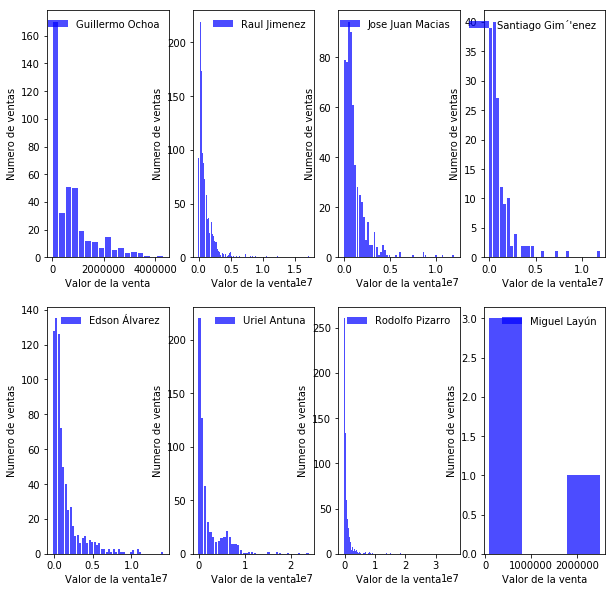

In [22]:
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharey = False, sharex = False, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter <= len(list_clients):

            ax.hist(df[df["sales_agent_name"] == sales_agents[counter]]["sales_usd"], color='blue',bins = "auto", alpha =0.7, rwidth = 0.85)
            
            ax.set_xlabel("Valor de la venta")
            ax.set_ylabel('Numero de ventas')
            #ax.set_ylim([0, 5])
            leg = ax.legend([str(sales_agents[counter])])
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
            
        counter += 1

plt.show()    

In [23]:
sales = []
for agent in sales_agents:     
    sales.append(df[df['sales_agent_name'] == agent]['sales_usd'].sum())
sales
#[df['sales_agent_name'] == 'Uriel Antuna']['sales_usd'].sum()

[268255718.14277998,
 1021804971.2968359,
 687485181.183179,
 185791783.662187,
 1041279662.577232,
 1331042418.9704483,
 729100633.9866452,
 3760206.2500000005]

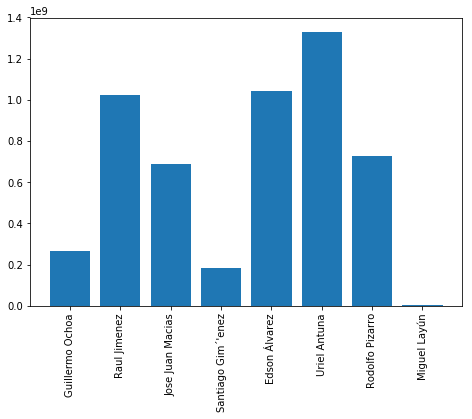

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sales_agents, sales)
plt.xticks(rotation=90)
plt.show()

In [25]:
# s_pa = []
# fig = plt.figure()
# width = 0.7
# ax = fig.add_axes([0,0,1,1])
# ind = sales_agents
# for product in list_products[0:10]:        
#     for agent in sales_agents:
#         s_pa.append(df[(df['sales_agent_name'] == agent) & (df['product_description'] == product)]["sales_usd"].sum())
        

                
#     ax.bar(ind, s_pa, width)
    
#     s_pa = [] 
# ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5','G6', 'G7','G8'))    
# ax.legend(labels= list_products) 
# ax.set_ylim((0, 1E9))
# plt.xticks(rotation=90)
# plt.show()


In [26]:
s_pa = []
width = 0.7
ind = sales_agents
for product in list_products[0:10]:        
    for agent in sales_agents:
        s_pa.append(df[(df['sales_agent_name'] == agent) & (df['product_description'] == product)]["sales_usd"].sum())

In [27]:
list_new = np.array_split(s_pa,10)

In [28]:
list_new[0]

array([2.63067652e+08, 8.14226442e+07, 6.25688268e+06, 0.00000000e+00,
       1.19318021e+08, 6.04218530e+06, 7.43939874e+06, 0.00000000e+00])

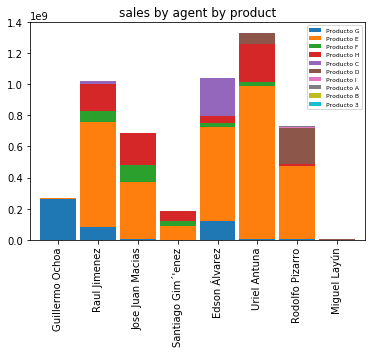

In [29]:
plotdata = pd.DataFrame({
    "Producto G":list_new[0],
    "Producto E":list_new[1],
    "Producto F":list_new[2],
    "Producto H":list_new[3],
    "Producto C":list_new[4],
    "Producto D":list_new[5],
    "Producto I":list_new[6],
    "Producto A":list_new[7],
    "Producto B":list_new[8],
    "Producto 3":list_new[9],  
    }, 
    index = sales_agents
)

plotdata.plot(kind='bar', stacked=True, width = 0.9, legend = True, title = 'sales by agent by product')
plt.legend(loc=1, prop={'size': 6})

In [30]:
s_pa = []
width = 0.7
ind = sales_agents
for client in list_clients:        
    for agent in sales_agents:
        s_pa.append(df[(df['sales_agent_name'] == agent) & (df['client_name'] == client)]["sales_usd"].sum())

In [31]:
list_new = np.array_split(s_pa, 7)

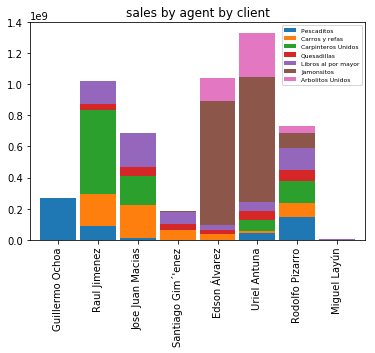

In [32]:
plotdata = pd.DataFrame({
    "Pescaditos ":list_new[0],
    "Carros y refas":list_new[1],
    "Carpinteros Unidos":list_new[2],
    "Quesadillas":list_new[3],
    "Libros al por mayor":list_new[4],
    "Jamonsitos":list_new[5],
    "Arbolitos Unidos":list_new[6],
  
    }, 
    index = sales_agents
)

plotdata.plot(kind='bar', stacked=True, width = 0.9, legend = True, title = 'sales by agent by client')
plt.legend(loc=1, prop={'size': 6})

265313501.19877997

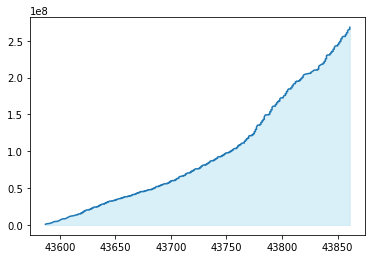

In [33]:
plt.fill_between( df[df["sales_agent_name"] == "Guillermo Ochoa"]["date"].sort_values(), df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Guillermo Ochoa"]["date"],(df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"][0:-1].sum()

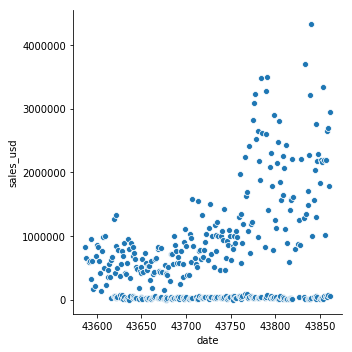

In [34]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Guillermo Ochoa"])

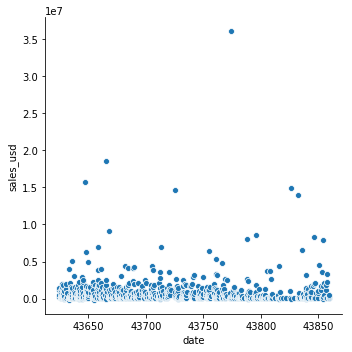

In [35]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Rodolfo Pizarro"])

728587048.9616452

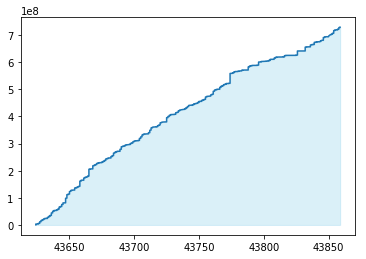

In [36]:
plt.fill_between( df[df["sales_agent_name"] == "Rodolfo Pizarro"]["date"].sort_values(), df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Rodolfo Pizarro"]["date"],(df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"][0:-1].sum()

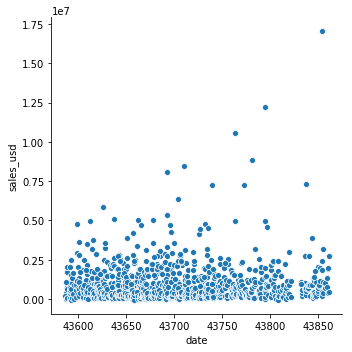

In [37]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Raul Jimenez"])

728587048.9616452

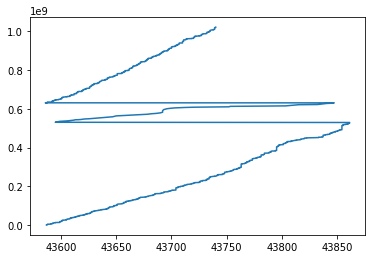

In [38]:
plt.plot(df[df["sales_agent_name"] == "Raul Jimenez"]["date"],(df[df["sales_agent_name"] == "Raul Jimenez"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"][0:-1].sum()

728587048.9616452

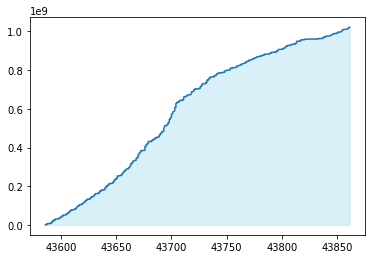

In [39]:
plt.fill_between( df[df["sales_agent_name"] == "Raul Jimenez"]["date"].sort_values(), df[df["sales_agent_name"] == "Raul Jimenez"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Raul Jimenez"]["date"].sort_values(),(df[df["sales_agent_name"] == "Raul Jimenez"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Rodolfo Pizarro"]["sales_usd"][0:-1].sum()

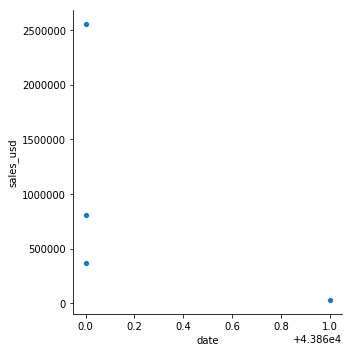

In [40]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Miguel Layún"])

3730583.4719000002

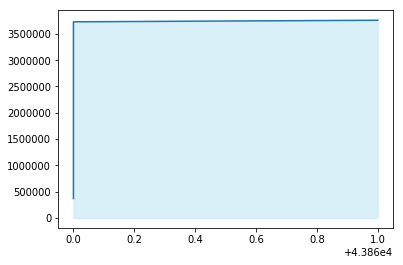

In [41]:
plt.fill_between( df[df["sales_agent_name"] == "Miguel Layún"]["date"].sort_values(), df[df["sales_agent_name"] == "Miguel Layún"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Miguel Layún"]["date"].sort_values(),(df[df["sales_agent_name"] == "Miguel Layún"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Miguel Layún"]["sales_usd"][0:-1].sum()

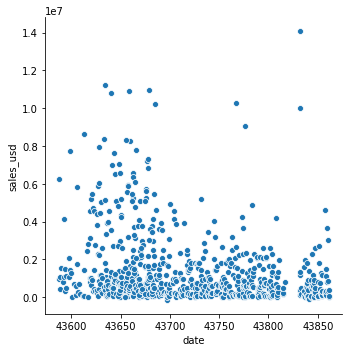

In [42]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Edson Álvarez"])

1039600270.837232

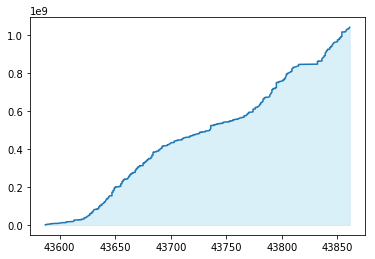

In [43]:
plt.fill_between( df[df["sales_agent_name"] == "Edson Álvarez"]["date"].sort_values(), df[df["sales_agent_name"] == "Edson Álvarez"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Edson Álvarez"]["date"].sort_values(),(df[df["sales_agent_name"] == "Edson Álvarez"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Edson Álvarez"]["sales_usd"][0:-1].sum()

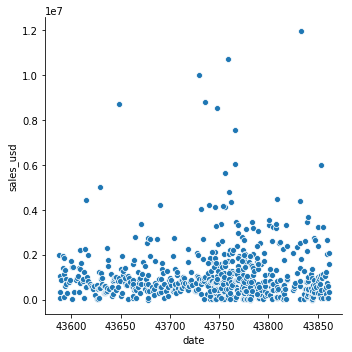

In [44]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Jose Juan Macias"])

686924208.302179

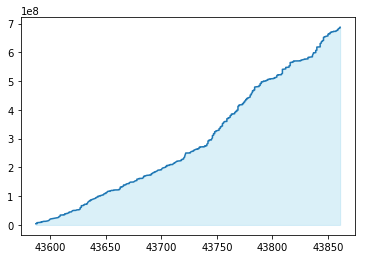

In [45]:
plt.fill_between( df[df["sales_agent_name"] == "Jose Juan Macias"]["date"].sort_values(), df[df["sales_agent_name"] == "Jose Juan Macias"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Jose Juan Macias"]["date"].sort_values(),(df[df["sales_agent_name"] == "Jose Juan Macias"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Jose Juan Macias"]["sales_usd"][0:-1].sum()

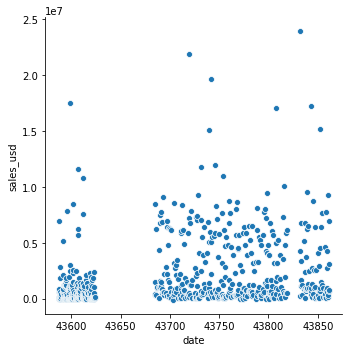

In [46]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Uriel Antuna"])

1330848319.5887482

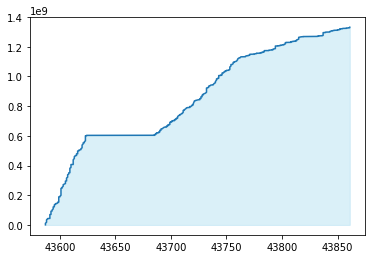

In [47]:
plt.fill_between( df[df["sales_agent_name"] == "Uriel Antuna"]["date"].sort_values(), df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Uriel Antuna"]["date"].sort_values(),(df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"].cumsum())) 
df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"][0:-1].sum()

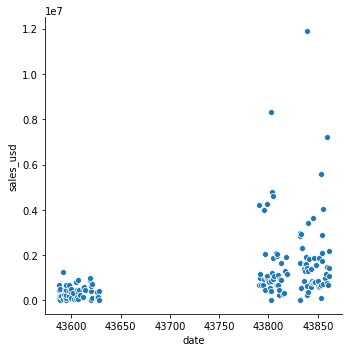

In [48]:
sns.relplot(x = 'date', y = 'sales_usd', data = df[df["sales_agent_name"] == "Santiago Gim´'enez"])

 el total de ventas es $ 185375489.096887  USD


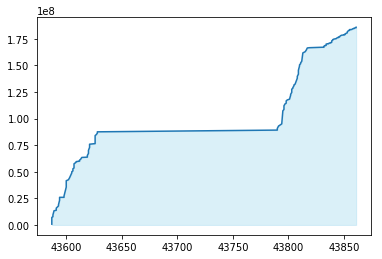

In [49]:
plt.fill_between( df[df["sales_agent_name"] == "Santiago Gim´'enez"]["date"].sort_values(), df[df["sales_agent_name"] == "Santiago Gim´'enez"]["sales_usd"].cumsum() , color="skyblue", alpha=0.3)
plt.plot(df[df["sales_agent_name"] == "Santiago Gim´'enez"]["date"].sort_values(),(df[df["sales_agent_name"] == "Santiago Gim´'enez"]["sales_usd"].cumsum())) 
print(" el total de ventas es $",df[df["sales_agent_name"] == "Santiago Gim´'enez"]["sales_usd"][0:-1].sum(), " USD")

In [50]:
df["date"] = df["date"] - min(df["date"])

In [51]:
dates_list = list(df['date'])
dates_list
len(dates_list)

4353

In [52]:
#dates_list

In [53]:
dates = {}
count = 0 
for i in dates_list:    
    dates[count] = (date.fromordinal(737425 + i)).isoformat()
    count = count + 1 
#dates

In [54]:
#dates.values()

# Predictive Analysis

In [55]:
dates = list(dates.values())

In [56]:
#date_object = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [57]:
#df["dates_well"] = date_object

In [58]:
df["dates_well"] = dates 

In [59]:
type(df["dates_well"])

pandas.core.series.Series

In [60]:
df.tail(1000)

,date,sales_usd,product_description,client_name,sales_agent_name,dates_well
3353,5,8.560210e+05,Producto E,Libros al por Mayor S.A.P.I de C.V.,Uriel Antuna,2020-01-06
3354,5,2.130158e+06,Producto E,Quesillos S.C.,Uriel Antuna,2020-01-06
3355,5,5.182580e+06,Producto D,Arbolitos Unidos de México S.A. de C.V.,Uriel Antuna,2020-01-06
3356,6,1.401958e+04,Producto G,Quesillos S.C.,Uriel Antuna,2020-01-07
3357,6,1.881073e+04,Producto E,Pescaditos SA de CV,Uriel Antuna,2020-01-07
3358,6,2.634201e+04,Producto E,Pescaditos SA de CV,Uriel Antuna,2020-01-07
3359,6,6.003392e+04,Producto G,Jamonsitos SAPI de CV,Uriel Antuna,2020-01-07
3360,6,1.114311e+05,Producto H,Pescaditos SA de CV,Uriel Antuna,2020-01-07
3361,6,2.824597e+05,Producto E,Arbolitos Unidos de México S.A. de C.V.,Uriel Antuna,2020-01-07
3362,6,3.152304e+05,Producto E,Jamonsitos SAPI de CV,Uriel Antuna,2020-01-07


In [61]:
# ax = sns.relplot(x = 'dates_well', y = 'sales_usd', data = df[df["sales_agent_name"] == "Santiago Gim´'enez"])
# xtick_locs = mpl.dates.date2num(df['dates_well'].tolist())
# xtick_labels = ["{}-{}".format(*i.split('-')[1:])[:-3] for i in xtick_labels]
# ax.set_xticklabels(xtick_labels


In [62]:
data = df[df["sales_agent_name"] == "Santiago Gim´'enez"]

In [63]:
# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# years_fmt = mdates.DateFormatter('%Y')

# fig, ax = plt.subplots()
# ax.plot('dates_well', 'sales_usd', data = data)
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)

# datemin = np.datetime64(df['dates_well'][0], 'Y')
# datemax = np.datetime64(max(df['dates_well'][:]), 'Y') + np.timedelta64(1, 'Y')
# ax.set_xlim(datemin, datemax)

In [64]:
df['dates_well'] = pd.to_datetime(df['dates_well']) 

In [65]:
df.dtypes

date                            int64
sales_usd                     float64
product_description            object
client_name                    object
sales_agent_name               object
dates_well             datetime64[ns]
dtype: object

In [66]:
mask = (df['dates_well'] > '2020-01-07') & (df['dates_well'] <= '2020-01-08')

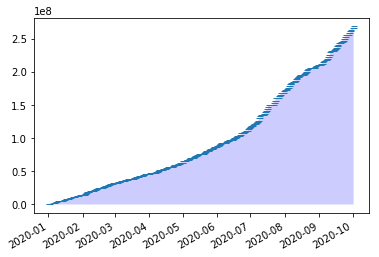

In [67]:
d = df[df["sales_agent_name"] == "Guillermo Ochoa"]["dates_well"].values

plt.plot_date(df[df["sales_agent_name"] == "Guillermo Ochoa"]["dates_well"], df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"].cumsum(), marker = '_', linestyle = 'solid', linewidth=0.1)
plt.gcf().autofmt_xdate()

plt.fill_between(d, df[df["sales_agent_name"] == "Guillermo Ochoa"]["sales_usd"].cumsum(),
                facecolor='blue', alpha=0.2, interpolate=True)


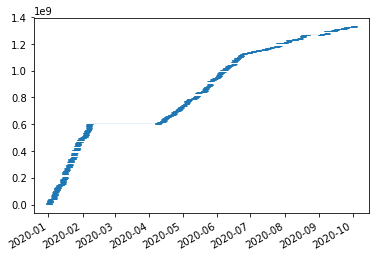

In [68]:
d = df[df["sales_agent_name"] == "Uriel Antuna"]["dates_well"].sort_values()

plt.plot_date(df[df["sales_agent_name"] == "Uriel Antuna"]["dates_well"].sort_values(), df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"].cumsum(), marker = '_', linestyle = 'solid', linewidth=0.1)
plt.gcf().autofmt_xdate()

#plt.fill_between(d, df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"].cumsum(),
                #facecolor='blue', alpha=0.2, interpolate=True)

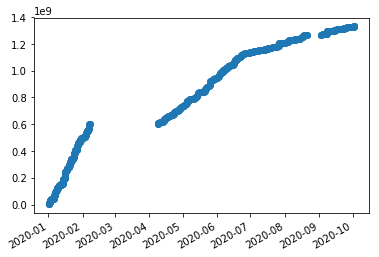

In [69]:
plt.plot_date(df[df["sales_agent_name"] == "Uriel Antuna"]["dates_well"].sort_values(), df[df["sales_agent_name"] == "Uriel Antuna"]["sales_usd"].cumsum())
plt.gcf().autofmt_xdate()

In [70]:
d = df[df["sales_agent_name"] == "Uriel Antuna"]["dates_well"].sort_values()
#d

In [71]:
df_new = df.sort_values(by = ["dates_well"])

In [72]:
df_new.to_csv("dataset_dates.csv")

In [73]:
df_new.tail()

,date,sales_usd,product_description,client_name,sales_agent_name,dates_well
3331,275,6.929017e+06,Producto H,Jamonsitos SAPI de CV,Uriel Antuna,2020-10-02
979,275,2.761848e+06,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Raul Jimenez,2020-10-02
978,275,4.284197e+05,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Raul Jimenez,2020-10-02
2141,275,1.071076e+06,Producto E,Libros al por Mayor S.A.P.I de C.V.,Santiago Gim´'enez,2020-10-02
4352,275,2.962278e+04,Producto E,Quesillos S.C.,Miguel Layún,2020-10-02


In [74]:
#dummy = pd.get_dummies(df["product_description"])

In [75]:
#df_new = pd.concat([ df_new, dummy ], axis = 1)

In [76]:
df_new.head()

,date,sales_usd,product_description,client_name,sales_agent_name,dates_well
1022,0,201673.385100,Producto E,Libros al por Mayor S.A.P.I de C.V.,Raul Jimenez,2020-01-01
0,1,829826.209000,Producto G,Quesillos S.C.,Guillermo Ochoa,2020-01-02
3334,1,583404.520400,Producto E,Jamonsitos SAPI de CV,Uriel Antuna,2020-01-02
3333,1,172505.485500,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Uriel Antuna,2020-01-02
3332,1,5399.391897,Producto G,Quesillos S.C.,Uriel Antuna,2020-01-02


In [77]:
#dummy_2 = pd.get_dummies(df["sales_agent_name"])
#df_new = pd.concat([ df_new, dummy_2 ], axis = 1)

In [78]:
df_new.head()

,date,sales_usd,product_description,client_name,sales_agent_name,dates_well
1022,0,201673.385100,Producto E,Libros al por Mayor S.A.P.I de C.V.,Raul Jimenez,2020-01-01
0,1,829826.209000,Producto G,Quesillos S.C.,Guillermo Ochoa,2020-01-02
3334,1,583404.520400,Producto E,Jamonsitos SAPI de CV,Uriel Antuna,2020-01-02
3333,1,172505.485500,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Uriel Antuna,2020-01-02
3332,1,5399.391897,Producto G,Quesillos S.C.,Uriel Antuna,2020-01-02


In [79]:
#dummy_3 = pd.get_dummies(df["client_name"])
#df_new = pd.concat([ df_new, dummy_3 ], axis = 1)

In [80]:
df_new["cumulative"] = df_new["sales_usd"].cumsum()

In [81]:
df_new.tail(30)

,date,sales_usd,product_description,client_name,sales_agent_name,dates_well,cumulative
4351,274,2.557195e+06,Producto D,Libros al por Mayor S.A.P.I de C.V.,Miguel Layún,2020-10-01,5.225341e+09
1719,274,6.200169e+05,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Jose Juan Macias,2020-10-01,5.225961e+09
976,274,1.940498e+06,Producto E,Libros al por Mayor S.A.P.I de C.V.,Raul Jimenez,2020-10-01,5.227901e+09
2140,274,6.682496e+05,Producto H,Pescaditos SA de CV,Santiago Gim´'enez,2020-10-01,5.228570e+09
388,274,1.790149e+06,Producto G,Quesillos S.C.,Guillermo Ochoa,2020-10-01,5.230360e+09
4350,274,8.064545e+05,Producto E,Carros y Refacciones del Centro S.A. de C.V.,Miguel Layún,2020-10-01,5.231166e+09
4349,274,3.669337e+05,Producto E,Carpinteros Unidos del Bajio,Miguel Layún,2020-10-01,5.231533e+09
3327,274,9.264545e+06,Producto E,Carpinteros Unidos del Bajio,Uriel Antuna,2020-10-01,5.240798e+09
3326,274,3.618779e+05,Producto E,Carpinteros Unidos del Bajio,Uriel Antuna,2020-10-01,5.241160e+09
3325,274,1.373486e+05,Producto H,Jamonsitos SAPI de CV,Uriel Antuna,2020-10-01,5.241297e+09


## Predictive Analysis for sales



In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [83]:
train = df_new.drop(['product_description', 'dates_well', 'client_name', 'sales_agent_name', "sales_usd", "cumulative"], axis = 1 )

In [84]:
test = df_new["cumulative"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 26)

In [86]:
len(y_train)

3047

In [87]:
regr = LinearRegression()

In [88]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
pred = regr.predict(X_test)

In [90]:
pred

array([2.14161741e+09, 4.30392837e+09, 3.55009519e+09, ...,
       1.36794652e+09, 2.43918314e+09, 1.38778424e+09])

In [91]:
#y_test

In [92]:
regr.score(X_test, y_test)

0.9983383772723836

In [93]:
#regr = LinearRegression(n_jobs = -1, normalize = True)

In [94]:
#regr.fit(X_train, y_train)

In [95]:
for product in list_products:
    a = (df_new[df_new["product_description"] == product]["sales_usd"].sum())/df["product_description"].value_counts()[product]
    print(" the mean value per sale of", product ," is", a )


 the mean value per sale of Producto G  is 1286028.6808723325
 the mean value per sale of Producto E  is 1161010.0660278327
 the mean value per sale of Producto F  is 968353.6334950184
 the mean value per sale of Producto H  is 1105499.6061479438
 the mean value per sale of Producto C  is 1421779.159719812
 the mean value per sale of Producto D  is 5190483.645724916
 the mean value per sale of Producto I  is 449654.4711758824
 the mean value per sale of Producto A  is 61992.653233642865
 the mean value per sale of Producto B  is 91021.61236
 the mean value per sale of Producto 3  is 484090.8882


In [96]:
df_agrup = df_new.groupby('date').sum()

In [97]:
df_agrup.head()

,sales_usd,cumulative
date,,
0,2.016734e+05,2.016734e+05
1,2.163397e+07,1.789954e+08
2,1.690228e+07,8.349323e+08
3,3.168731e+06,2.032792e+08
5,1.818410e+07,8.078814e+08
